---
MODULES
---

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from google.colab import drive
from oauth2client.client import GoogleCredentials

In [ ]:
import string
import re
import sys
import glob

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [ ]:
import nltk
from nltk.corpus import stopwords as sw
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.cluster import Birch
from sklearn.cluster import SpectralClustering
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,mean_absolute_error, rand_score, homogeneity_score, completeness_score, v_measure_score

---
GOOGLE DRIVE AUTHETICATION
---

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# Insert the directory
sys.path.insert(0,'/content/drive/My Drive/Colab Notebooks')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
INPUT_FOLDER = '/content/drive/My Drive/Colab Notebooks/DataMiningDataset/bbc/bbc.csv'

In [ ]:
data = pd.read_csv(INPUT_FOLDER ,delimiter=';', names = ['category','content'])
data = data.sample(frac = 1).reset_index(drop = True)

In [ ]:
data.head(50)

,category,content
0,tech,Rivals of the xc xa Apple The Mac mini is...
1,tech,Microsoft debuts security tools Microsoft is ...
2,sport,Mourinho receives Robson warning Sir Bobby Ro...
3,tech,Parents face video game lessons Ways of ensur...
4,tech,Local net TV takes off in Austria An Austrian...
5,sport,Gerrard plays down European hopes Steven Gerr...
6,sport,Wood - Ireland can win Grand Slam Former capt...
7,tech,Go-ahead for new internet names The internet ...
8,entertainment,New media battle for Bafta awards The BBC lea...
9,entertainment,Landmark movies of hailed US film profes...


In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
punc = string.punctuation
stop_words_english = sw.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)


In [ ]:
# to lowercase operation for every single word
bbc_dataframe = data['content'].apply(lambda x:" ".join(x.lower() for x in str(x).split()))

# punctuation remove operation
bbc_dataframe = bbc_dataframe.str.replace("[^\w\s]", "")

# number remove operation
bbc_dataframe = bbc_dataframe.str.replace("\d", "")

# türkçe stopwords'leri silmek
bbc_dataframe = bbc_dataframe.apply(lambda x : " ".join(x for x in str(x).split() if x not in stop_words_english))

# nltk normalization operation
bbc_dataframe = bbc_dataframe.apply(lambda sentence: ' '.join(lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(sentence)))

# series to dataframe operation
df = pd.DataFrame(bbc_dataframe, columns = ['category','content'])
df['category'] = data['category']


In [ ]:
df['id'] = range(0, len(df['content']))

In [ ]:
df.head(10)

,category,content,id
0,tech,rival xc xa apple mac mini cheapest apple comp...,0
1,tech,microsoft debut security tool microsoft releas...,1
2,sport,mourinho receives robson warn sir bobby robson...,2
3,tech,parent face video game lesson way ensure paren...,3
4,tech,local net tv take austria austrian village tes...,4
5,sport,gerrard play european hope steven gerrard admi...,5
6,sport,wood ireland win grand slam former captain kei...,6
7,tech,goahead new internet name internet could soon ...,7
8,entertainment,new medium battle bafta award bbc lead nominat...,8
9,entertainment,landmark movie hail u film professional declar...,9


In [ ]:
# COUNT VECTORIZER

vec = CountVectorizer()
features= vec.fit_transform(df['content'])
print("Input features shape:", features.shape)


Input features shape: (2225, 23351)


In [ ]:
# TF-ID VECTORIZER

vec = TfidfVectorizer()
features= vec.fit_transform(df['content'])
print("Input features shape:", features.shape)
print(f"\nTake a look at the features extracted from the first news article:\n{features[0].toarray()}")

Input features shape: (2225, 23351)

Take a look at the features extracted from the first news article:
[[0. 0. 0. ... 0. 0. 0.]]


---
K-Means
---

In [ ]:
kmeans = KMeans(5, n_init=10, random_state=42)
kmeans.fit(features)
df['kmeans'] = kmeans.labels_

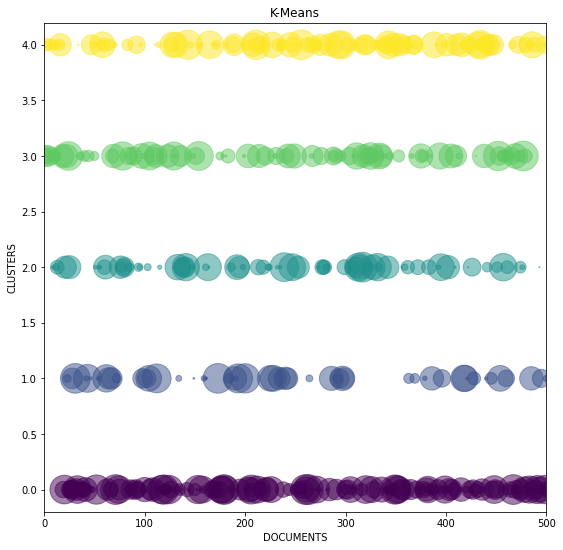

In [ ]:
area = (30 * np.random.rand(2225))**2
plt.figure(figsize=(9, 9))
plt.scatter(df['id'], df['kmeans'], c=kmeans.labels_.astype(float),s=area, alpha=0.5)
plt.title('K-Means')
plt.xlabel('DOCUMENTS')
plt.ylabel('CLUSTERS')
plt.xlim(0,500)
plt.show()


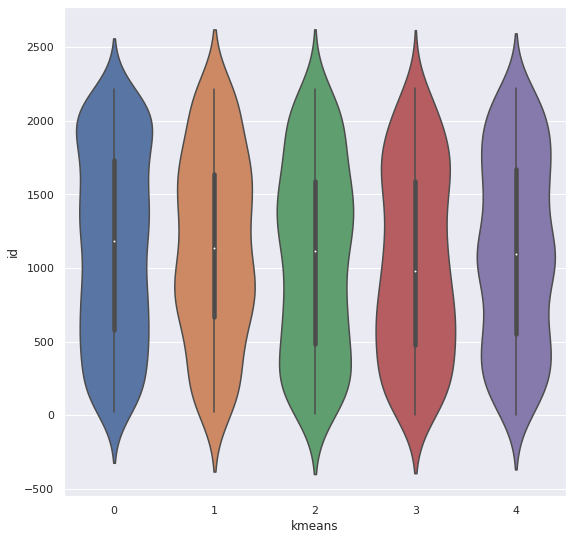

In [ ]:
# SNS VIOLIN PLOT 
sns.set(rc={'figure.figsize':(9,9)})
sns.violinplot(x=df["kmeans"], y=df['id'], data=df, orient='vertical')

In [ ]:
df['kmeans'].value_counts()

0    794
4    482
3    350
2    318
1    281
Name: kmeans, dtype: int64

---
BIRCH
---

In [ ]:
model = Birch(branching_factor = 50, n_clusters = 5)
model.fit(features)
pred = model.predict(features)


In [ ]:
df['birch'] = pred

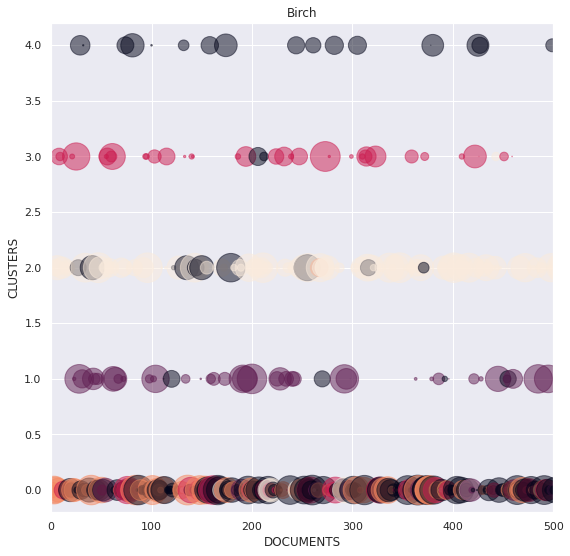

In [ ]:
area = (30 * np.random.rand(2225))**2
plt.figure(figsize=(9, 9))
plt.scatter(df['id'], df['birch'], c=kmeans.labels_.astype(float),s=area, alpha=0.5)
plt.title('Birch')
plt.xlabel('DOCUMENTS')
plt.ylabel('CLUSTERS')
plt.xlim(0,500)
plt.show()


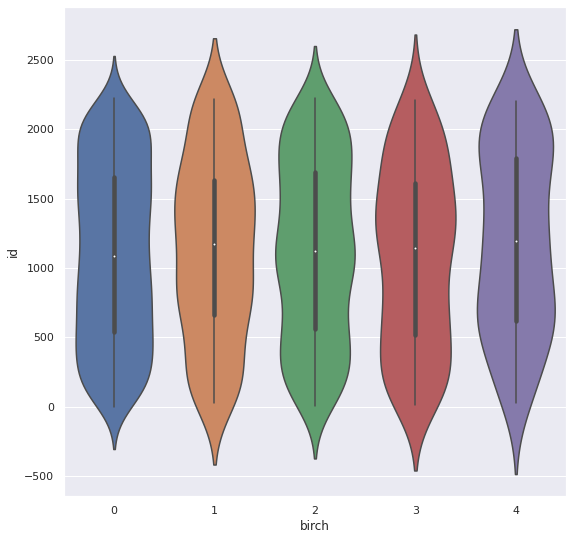

In [ ]:
sns.set(rc={'figure.figsize':(9,9)})
sns.violinplot(x=df["birch"], y=df['id'], data=df, orient='vertical')

In [ ]:
df['birch'].value_counts()

0    1263
2     480
1     214
3     161
4     107
Name: birch, dtype: int64

---
Spectral Clustering
---

In [ ]:
sc = SpectralClustering(n_clusters=5, assign_labels='discretize', random_state=0).fit(features)
sc.labels_

array([0, 0, 1, ..., 0, 1, 1])

In [ ]:
df['spectral'] = sc.labels_

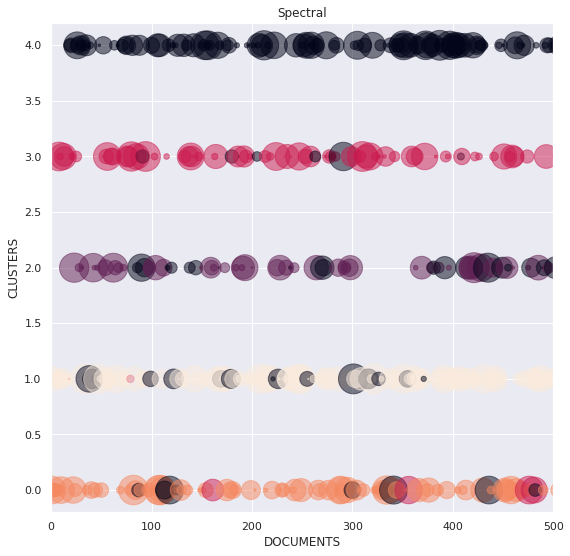

In [ ]:
area = (30 * np.random.rand(2225))**2
plt.figure(figsize=(9, 9))
plt.scatter(df['id'], df['spectral'], c=kmeans.labels_.astype(float),s=area, alpha=0.5)
plt.title('Spectral')
plt.xlabel('DOCUMENTS')
plt.ylabel('CLUSTERS')
plt.xlim(0,500)
plt.show()


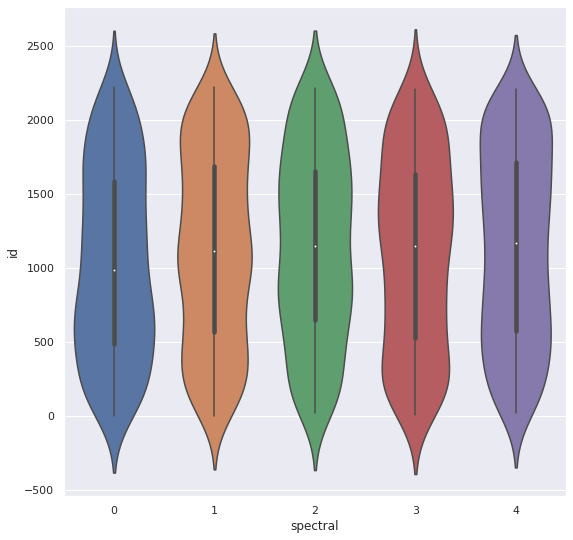

In [ ]:
sns.set(rc={'figure.figsize':(9,9)})
sns.violinplot(x=df["spectral"], y=df['id'], data=df, orient='vertical')

---
COMPARE
---

In [ ]:
df['kmeans'].value_counts()

0    794
4    482
3    350
2    318
1    281
Name: kmeans, dtype: int64

In [ ]:
df['spectral'].value_counts()

1    565
4    551
0    401
2    365
3    343
Name: spectral, dtype: int64

In [ ]:
df['birch'].value_counts()

0    1263
2     480
1     214
3     161
4     107
Name: birch, dtype: int64

In [ ]:
df['category'].value_counts()

1           511
3           510
politics    417
0           401
2           386
Name: category, dtype: int64

In [ ]:
df['category'] = df['category'].replace(['tech'],0)
df['category'] = df['category'].replace(['sport'],1)
df['category'] = df['category'].replace(['entertainment'],2)
df['category'] = df['category'].replace(['business'],3)
df['category'] = df['category'].replace(['politics'],4)

In [ ]:
y_pred=df["kmeans"]
y_true=df['category']
print("Accuracy =",accuracy_score(y_true,y_pred))
print("Precision Score = ", precision_score(y_true, y_pred, average='macro'))
print("Recall Score = ", recall_score(y_true, y_pred, average='macro'))
print("F1 Score = ", f1_score(y_true, y_pred, average='macro'))

difference_array = np.subtract(y_pred, y_true)
squared_array = np.square(difference_array)
print("\n\nMSE = ", squared_array.mean())
print("RMSE = ", math.sqrt(squared_array.mean()))
print("MAE = ", mean_absolute_error(y_true, y_pred))
print("\n\nRand Score = ", rand_score(y_true, y_pred))
print("Homogeneity Score", homogeneity_score(y_true, y_pred))
print("Completeness Score", completeness_score(y_true, y_pred))
print("V Measure Score ",v_measure_score(y_true, y_pred))

Accuracy = 0.1559550561797753
Precision Score =  0.20335896229772263
Recall Score =  0.17833018250907098
F1 Score =  0.187636244187488


MSE =  7.654831460674157
RMSE =  2.766736608474713
MAE =  2.5087640449438204


Rand Score =  0.8770790558564384
Homogeneity Score 0.6883891482145873
Completeness Score 0.7211000329588624
V Measure Score  0.7043650197482092


In [ ]:
y_pred=df["spectral"]
y_true=df['category']
print("Accuracy =",accuracy_score(y_true,y_pred))
print("Precision Score = ", precision_score(y_true, y_pred, average='macro'))
print("Recall Score = ", recall_score(y_true, y_pred, average='macro'))
print("F1 Score = ", f1_score(y_true, y_pred, average='macro'))

difference_array = np.subtract(y_pred, y_true)
squared_array = np.square(difference_array)
print("\n\nMSE = ", squared_array.mean())
print("RMSE = ", math.sqrt(squared_array.mean()))
print("MAE = ", mean_absolute_error(y_true, y_pred))
print("\n\nRand Score = ", rand_score(y_true, y_pred))
print("Homogeneity Score", homogeneity_score(y_true, y_pred))
print("Completeness Score", completeness_score(y_true, y_pred))
print("V Measure Score ",v_measure_score(y_true, y_pred))


Accuracy = 0.41168539325842696
Precision Score =  0.3783956732966848
Recall Score =  0.4016296801468601
F1 Score =  0.3892019824926671


MSE =  1.3568539325842697
RMSE =  1.164840732711674
MAE =  0.8202247191011236


Rand Score =  0.9375689111632043
Homogeneity Score 0.7759025367201584
Completeness Score 0.7831067033752652
V Measure Score  0.7794879748554129


In [ ]:
y_pred=df["birch"]
y_true=df['category']
print("Accuracy =",accuracy_score(y_true,y_pred))
print("Precision Score = ", precision_score(y_true, y_pred, average='macro'))
print("Recall Score = ", recall_score(y_true, y_pred, average='macro'))
print("F1 Score = ", f1_score(y_true, y_pred, average='macro'))

difference_array = np.subtract(y_pred, y_true)
squared_array = np.square(difference_array)
print("\n\nMSE = ", squared_array.mean())
print("RMSE = ", math.sqrt(squared_array.mean()))
print("MAE = ", mean_absolute_error(y_true, y_pred))
print("\n\nRand Score = ", rand_score(y_true, y_pred))
print("Homogeneity Score", homogeneity_score(y_true, y_pred))
print("Completeness Score", completeness_score(y_true, y_pred))
print("V Measure Score ",v_measure_score(y_true, y_pred))

Accuracy = 0.17797752808988765
Precision Score =  0.06487560427455089
Recall Score =  0.19729304190504132
F1 Score =  0.09590378883411672


MSE =  4.668764044943821
RMSE =  2.160732293678192
MAE =  1.743820224719101


Rand Score =  0.6925147522431493
Homogeneity Score 0.4362057658130799
Completeness Score 0.5758834849461868
V Measure Score  0.4964062139413186


---
DBSCAN
---

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(features)
distances, indices = neighbors_fit.kneighbors(features)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

NameError: ignored

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np
from sklearn.metrics import silhouette_samples, silhouette_score
sample = [1, 0.001, 0.002, 0.003,0.004, 0.005, 0.006, 0.007, 0.008, 0.009]

clustering = DBSCAN(eps=2.1, min_samples=10).fit(features)
df['dbscan'] = clustering.labels_
print(clustering.labels_)
max_value = np.max(df['dbscan'])
print(max_value)


In [ ]:
df['dbscan'].value_counts()

In [ ]:
sns.set(rc={'figure.figsize':(9,9)})
sns.violinplot(x=df["dbscan"], y=df['id'], data=df, orient='vertical')

In [ ]:
df

In [ ]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(features)
distances, indices = neighbors_fit.kneighbors(features)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.xlim(3000, 3500)
plt.ylim(0.01276,0.0128)
plt.plot(distances)

---
OPTICS
---

In [ ]:
from sklearn.cluster import OPTICS
oc = OPTICS(min_samples=4).fit(features.toarray())
oc.labels_

In [ ]:
df['OPTICS'] = oc.labels_

In [ ]:
sns.set(rc={'figure.figsize':(9,9)})
sns.violinplot(x=df["OPTICS"], y=df['id'], data=df, orient='vertical')